In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [11]:
import matplotlib.pyplot as plt

In [2]:

import numpy as np

def read_images(path):
    with open(path, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

X_train = read_images("Dataset/fashion-mnist/train-images-idx3-ubyte/train-images-idx3-ubyte")
X_test  = read_images("Dataset/fashion-mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")


In [3]:
def read_labels(path):
    with open(path, "rb") as f:
        return np.frombuffer(f.read(), dtype=np.uint8, offset=8)

y_train = read_labels("Dataset/fashion-mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte")
y_test  = read_labels("Dataset/fashion-mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

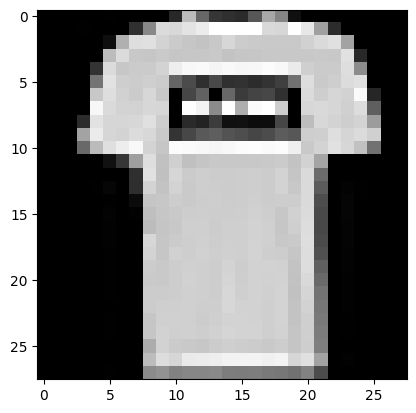

In [12]:
plt.imshow(X_train[1,:],cmap="gray")

In [13]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg')


## L1 and L2

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),                       
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])